<a href="https://colab.research.google.com/github/BardRimon/Study/blob/main/algorithms_and_data_structures/sem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лекция

### Метод Шелла (метод уменьшающегося расстояния)

27365184 сравниваем элементы на расстоянии $\frac{n}{2}$ : 2-5, 2-1, 3-8, ...
получаем 21345786 теперь $l = \frac{n}{4}$ : 2-3-5-8-6, 1-4-5-8

и теперь для 21345687 $l = \frac{n}{8}$ и сравниваем 21 34 56 87

и получаем 12345678 - успех

### Быстрая сортировка
### Пирамидальная

# Семинар



### Метод Шелла

In [6]:
def shell_sort_2(arr):
    n = len(arr)
    gap = n // 2
    while gap > 0:
        for i in range(gap, n):
            temp = arr[i]
            j = i
            while j >= gap and arr[j - gap] > temp:
                arr[j] = arr[j - gap]
                j -= gap
            arr[j] = temp
        gap //= 2
    return arr

def shell_sort_fib(arr):
    n = len(arr)
    fib_nums = [1, 2]
    while fib_nums[-1] < n:
        fib_nums.append(fib_nums[-1] + fib_nums[-2])
    gap = fib_nums.pop()

    while gap > 0:
        for i in range(gap, n):
            temp = arr[i]
            j = i
            while j >= gap and arr[j - gap] > temp:
                arr[j] = arr[j - gap]
                j -= gap
            arr[j] = temp
        gap //= 2
    return arr



### Пирамидальная

In [11]:
def heapify(arr, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2

    if l < n and arr[i] < arr[l]:
        largest = l
    if r < n and arr[largest] < arr[r]:
        largest = r


    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)


def heap_sort(arr):
    n = len(arr)

    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)
    return arr

In [15]:
import time
import random
import numpy as np
#check
l = np.random.randint(1001, size=10000)
l1 = l.copy()
l2 = l.copy()
l3 = l.copy()
print(shell_sort_2(l1))
print(shell_sort_fib(l2))
print(heap_sort(l3))
l.sort()
if np.array_equal(l, l1) and np.array_equal(l, l2) and np.array_equal(l, l3):
    print("ok")


[   0    0    0 ... 1000 1000 1000]
[   0    0    0 ... 1000 1000 1000]
[   0    0    0 ... 1000 1000 1000]
ok


In [18]:
time_shell_2 = []
time_shell_fib = []
time_heap = []
x = range(100, 10000, 50)

for i in x:
    l = np.random.randint(1001, size=i)
    l1 = l.copy()
    l2 = l.copy()
    l3 = l.copy()
    start_time = time.time()
    shell_sort_2(l1)
    time_shell_2.append(time.time() - start_time)

    start_time = time.time()
    shell_sort_fib(l2)
    time_shell_fib.append(time.time() - start_time)

    start_time = time.time()
    heap_sort(l3)
    time_heap.append(time.time() - start_time)




теперь графики

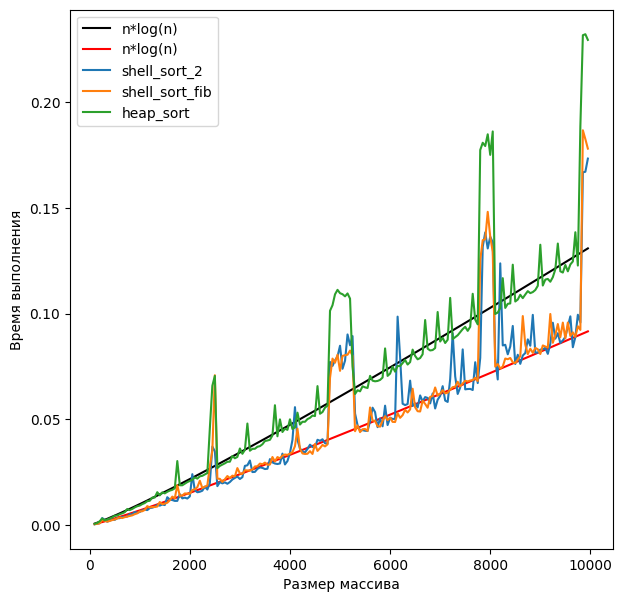

In [40]:
import matplotlib.pyplot as plt

f = []
g = []
for i in x:
    f.append(i * np.log(i) / 1000000)
g = f.copy()
g = np.array(g) * 10 / 7
plt.subplots(figsize=(7, 7))
plt.plot(x, g, label='n*log(n)', color='black')
plt.plot(x, f, label='n*log(n)', color='red')
plt.plot(x, time_shell_2, label='shell_sort_2')
plt.plot(x, time_shell_fib, label='shell_sort_fib')
plt.plot(x, time_heap, label='heap_sort')
plt.xlabel('Размер массива')
plt.ylabel('Время выполнения')
plt.legend()
plt.show()

In [43]:
time_shell_2 = []
time_shell_fib = []
time_heap = []
x = range(100, 10001, 1000)

for i in x:
    l = np.random.randint(1001, size=i)
    l1 = l.copy()
    l2 = l.copy()
    l3 = l.copy()

    while True:
        start_time = time.time()
        shell_sort_2(l1)
        time_shell_2.append(time.time() - start_time)

        start_time = time.time()
        shell_sort_fib(l2)
        time_shell_fib.append(time.time() - start_time)

        start_time = time.time()
        heap_sort(l3)
        time_heap.append(time.time() - start_time)

        if len(time_shell_2) > 2 and (time_shell_2[-1] / time_shell_2[-2] < 1000 and time_shell_fib[-1] / time_shell_fib[-2] < 1000 and time_heap[-1] / time_heap[-2] < 1000):
            break

        else:
            time_shell_2.pop()
            time_shell_fib.pop()
            time_heap.pop()


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

f = []
g = []
for i in x:
    f.append(i * np.log(i) / 1000000)
g = f.copy()
g = np.array(g) * 10 / 7
plt.subplots(figsize=(7, 7))
plt.plot(x, g, label='n*log(n)', color='black')
plt.plot(x, f, label='n*log(n)', color='red')
plt.plot(x, time_shell_2, label='shell_sort_2')
plt.plot(x, time_shell_fib, label='shell_sort_fib')
plt.plot(x, time_heap, label='heap_sort')
plt.xlabel('Размер массива')
plt.ylabel('Время выполнения')
plt.legend()
plt.show()